In [466]:
import pandas as pd
import numpy as np

In [467]:
df = pd.read_csv('airbnb_open_data.csv', sep=',')

df.head()

<ipython-input-467-04f3abf9054a>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_open_data.csv', sep=',')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [469]:
#Transformasi Data
# Konversi kolom harga dan service fee ke float (hapus simbol $, koma)
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', '').strip())
    return x

df['price'] = df['price'].apply(clean_currency)
df['service fee'] = df['service fee'].apply(clean_currency)

# Konversi kolom bertipe numerik ke integer jika tidak ada pecahan
int_columns = ['minimum nights', 'number of reviews', 'availability 365', 'Construction year']
for col in int_columns:
    df[col] = df[col].astype('Int64')  # Support NaN

# Ubah kolom tanggal ke datetime
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Opsional: ubah beberapa kolom jadi kategori (untuk efisiensi atau modeling)
category_cols = [
    'room type', 'cancellation_policy', 'instant_bookable',
    'host_identity_verified', 'neighbourhood group',
    'neighbourhood', 'country', 'country code'
]
for col in category_cols:
    df[col] = df[col].astype('category')

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  category      
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  category      
 6   neighbourhood                   102583 non-null  category      
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  category      
 10  country code                    102468 non-null  categor

In [471]:
df['room type'].value_counts()

,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


In [472]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.0,102352.000000,102326.000000,102190.0,102416.0,86706,86720.000000,102273.000000,102280.000000,102151.0
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.0,50.000000,10.000000,-1223.0,0.0,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.0
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.0,340.000000,68.000000,2.0,1.0,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.0
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.0,624.000000,125.000000,3.0,7.0,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.0
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.0,913.000000,183.000000,5.0,30.0,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.0
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.0,1200.000000,240.000000,5645.0,1024.0,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.0
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [473]:
df.shape

(102599, 26)

In [474]:
# Hapus kolom yang tidak penting
columns_to_drop = ['id', 'host id', 'host name', 'house_rules', 'license']
df = df.drop(columns=columns_to_drop)

In [475]:
print(df.isnull().sum())

NAME                                250
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64


In [476]:
# Drop kolom NAME (tidak penting untuk analisis)
df.drop(columns=['NAME'], inplace=True)

# Kategori: isi dengan modus
fill_mode_cols = ['neighbourhood group', 'neighbourhood', 'country', 'country code',
                  'instant_bookable', 'cancellation_policy']
for col in fill_mode_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Kolom kategorikal dengan missing sedikit: isi dengan 'unknown'
# Add 'unknown' to the categories of 'host_identity_verified'
df['host_identity_verified'] = df['host_identity_verified'].cat.add_categories(['unknown'])
df['host_identity_verified'].fillna('unknown', inplace=True)

# Koordinat lokasi: drop baris yang null
df.dropna(subset=['lat', 'long'], inplace=True)

# Pembersihan kolom price
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
df = df[df['price'] > 0]
df = df[(df['price'] >= 5) & (df['price'] <= 800)]
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.0 * IQR) & (df['price'] <= Q3 + 1.0 * IQR)]

# Kolom numerik: isi dengan median
fill_median_cols = ['Construction year', 'service fee', 'minimum nights',
                    'number of reviews', 'review rate number',
                    'calculated host listings count', 'availability 365']
for col in fill_median_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Kolom 'reviews per month': isi dengan 0 (anggap belum ada review)
df['reviews per month'].fillna(0, inplace=True)


<ipython-input-476-2d6691ee143a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-476-2d6691ee143a>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [477]:
print(df.isnull().sum())

host_identity_verified                0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                       10429
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
dtype: int64


##**Exploratory Data Analysis (EDA)**

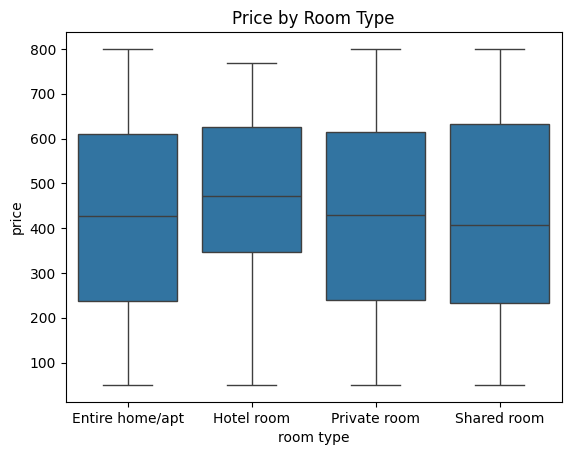

In [478]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='room type', y='price', data=df)
plt.title("Price by Room Type")
plt.show()


**Insight:** \
Entire home/apt memiliki harga median tertinggi. \

Shared room dan Private room jauh lebih terjangkau.

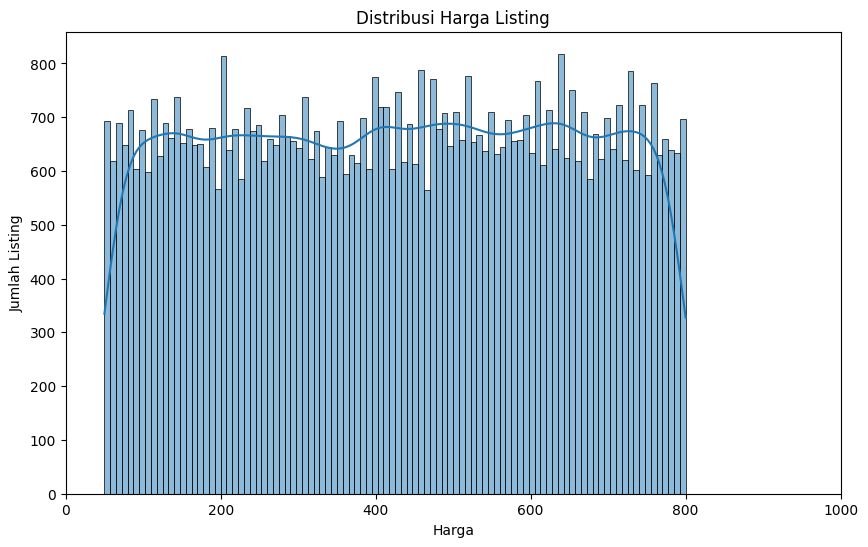

In [479]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # Batasi untuk hindari outlier ekstrem
plt.title('Distribusi Harga Listing')
plt.xlabel('Harga')
plt.ylabel('Jumlah Listing')
plt.show()

**Insight:** \
Mayoritas listing memiliki harga di bawah 500, artinya pasar didominasi oleh properti berbiaya rendah. \

Ada outlier hingga ribuan dolar, kemungkinan listing premium/luxury.

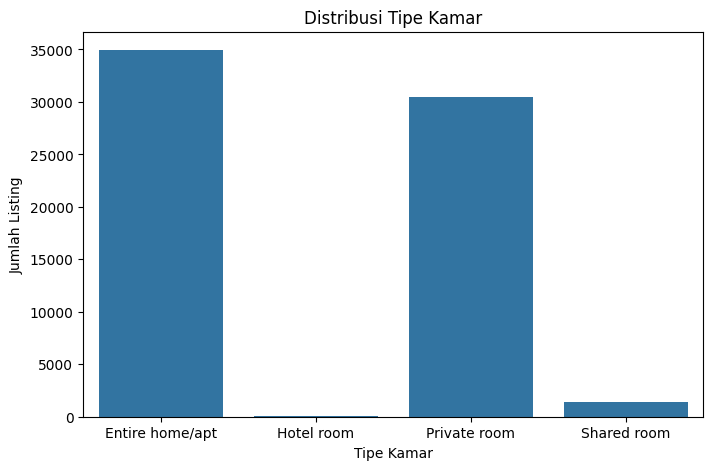

In [480]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type', data=df)
plt.title('Distribusi Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Listing')
plt.show()


In [481]:
df['room type'].value_counts(normalize=True) * 100

,proportion
room type,
Entire home/apt,52.242555
Private room,45.523861
Shared room,2.122952
Hotel room,0.110633


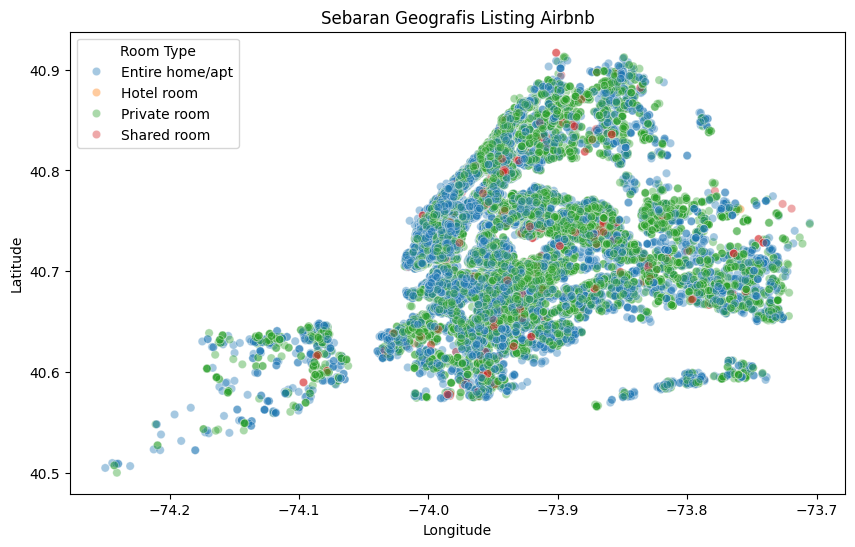

In [482]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='room type', data=df, alpha=0.4)
plt.title('Sebaran Geografis Listing Airbnb')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type')
plt.show()


**Insight:** \
Konsentrasi listing tinggi di beberapa area (kemungkinan pusat kota). \

Setiap room type tersebar di area berbeda — bisa dianalisis lebih lanjut secara spasial.

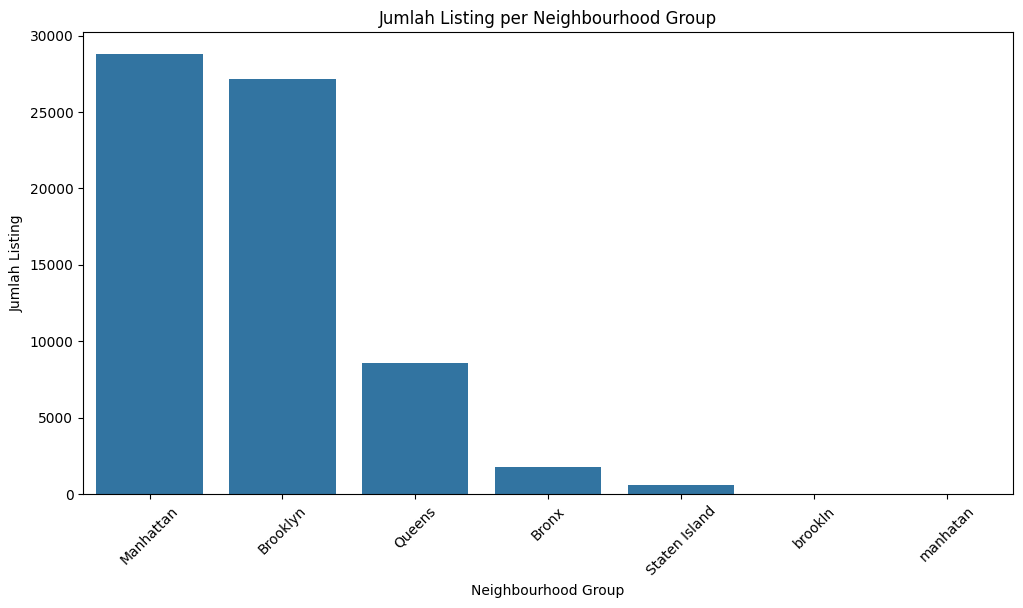

In [483]:
plt.figure(figsize=(12,6))
sns.countplot(x='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index)
plt.title('Jumlah Listing per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.show()


In [484]:
df.drop(df[df['neighbourhood group'].isin(['brookln', 'manhatan'])].index, inplace=True)

In [485]:
df['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,28775
Brooklyn,27132
Queens,8568
Bronx,1786
Staten Island,625
brookln,0
manhatan,0


**Insight:** \
Beberapa neighbourhood group sangat dominan. \

Dapat jadi fokus pemasaran atau area dengan persaingan tinggi.

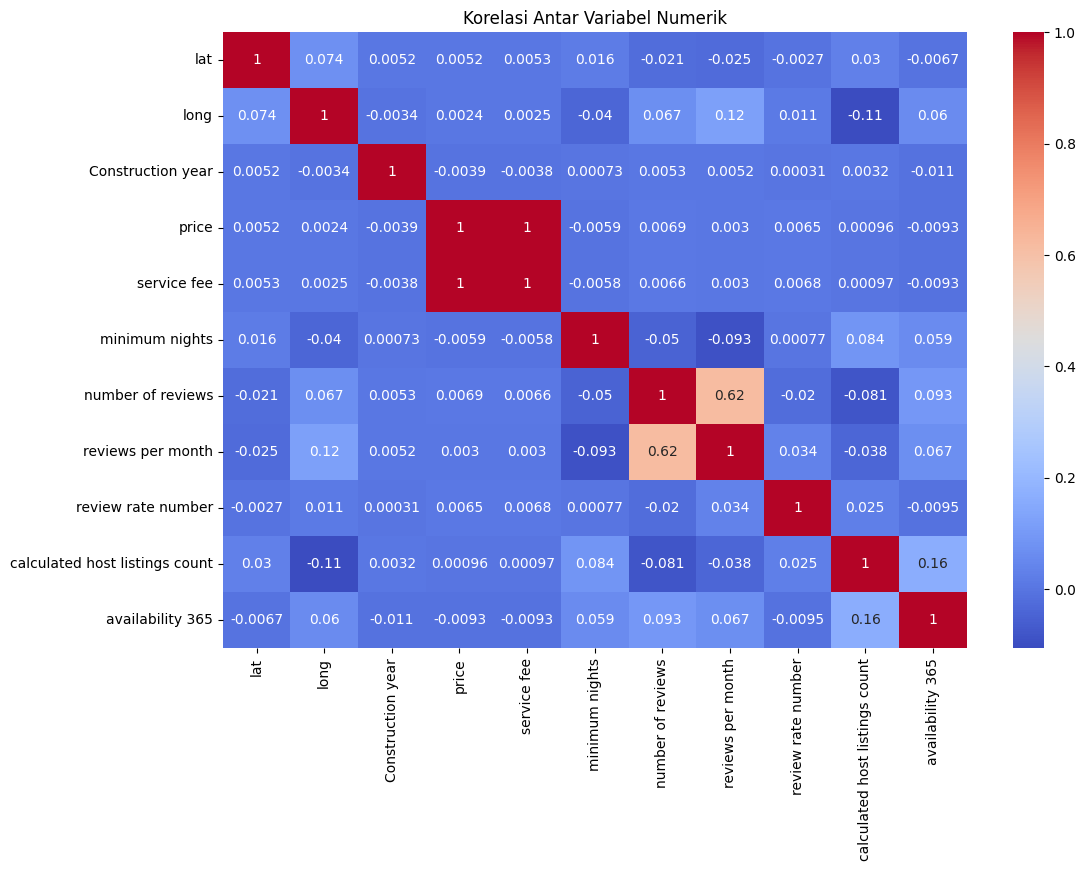

In [486]:
plt.figure(figsize=(12,8))
numerics = df.select_dtypes(include=['float64', 'int64', 'Int64'])
corr = numerics.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


**Insight:** \
price mungkin berkorelasi lemah/moderat dengan number of reviews, availability 365, dll. \

Perlu investigasi lebih lanjut untuk fitur yang bisa prediksi harga.

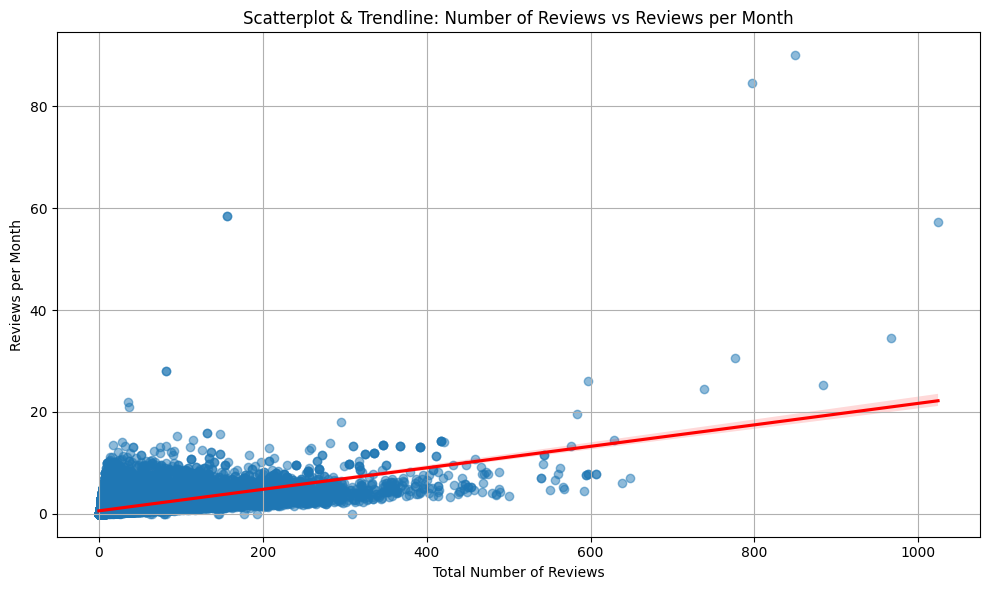

In [487]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan nama kolom sesuai
plt.figure(figsize=(10, 6))
sns.regplot(
    x='number of reviews',
    y='reviews per month',
    data=df,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'},
)
plt.title('Scatterplot & Trendline: Number of Reviews vs Reviews per Month')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Reviews per Month')
plt.grid(True)
plt.tight_layout()
plt.show()


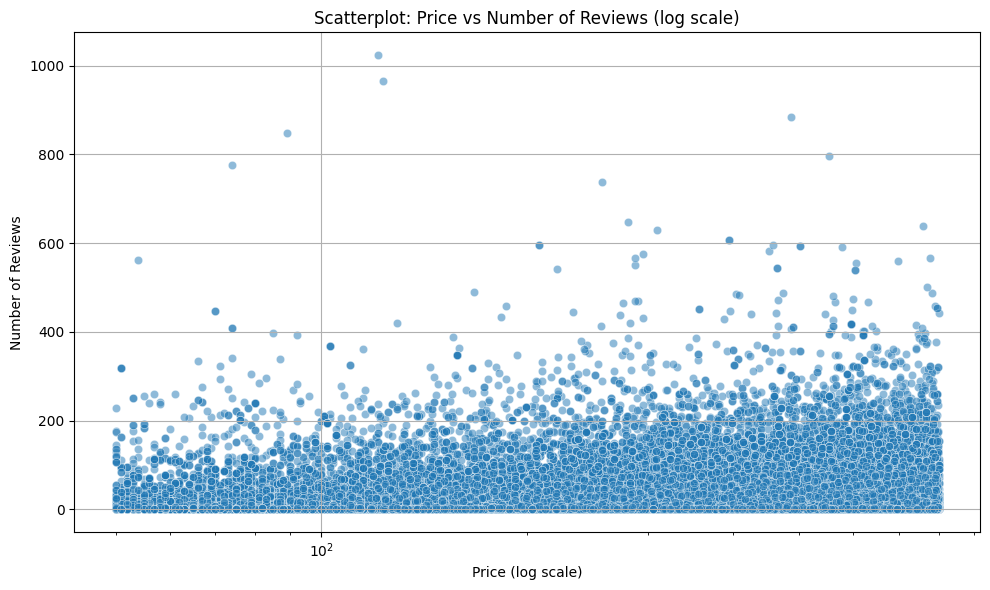

In [488]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='number of reviews', alpha=0.5)
plt.xscale('log')  # karena price cenderung skewed
plt.title('Scatterplot: Price vs Number of Reviews (log scale)')
plt.xlabel('Price (log scale)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:** \
Banyak listing dengan harga murah justru punya review lebih banyak → indikasi high demand di segmen low-mid range. \

Listing mahal review-nya jarang → bisa jadi pasar niche.

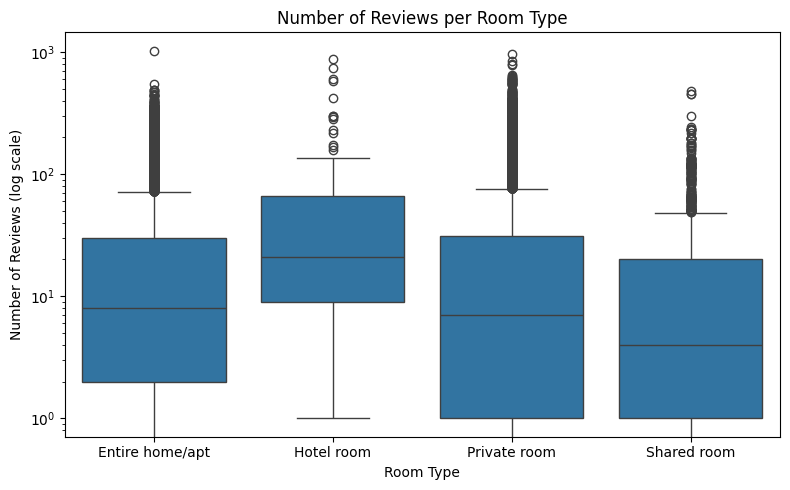

In [489]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room type', y='number of reviews')
plt.yscale('log')  # untuk merapikan outlier tinggi
plt.title('Number of Reviews per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews (log scale)')
plt.tight_layout()
plt.show()


**Insight:** \
Entire home/apt cenderung punya lebih sedikit review, tapi stabil. \

Private room lebih sering direview → bisa jadi karena harga lebih terjangkau, cocok untuk solo traveler.

##**Feature Engineering**

In [490]:
# Feature Engineering
df['price_per_night'] = df['price'] / df['minimum nights']
# Hapus nilai negatif atau inf pada price_per_night
df = df[df['price_per_night'] > 0]
df = df[np.isfinite(df['price_per_night'])]
# Terapkan batasan untuk price_per_night (misalnya, $1 hingga $500)
df = df[(df['price_per_night'] >= 1) & (df['price_per_night'] <= 500)]
# Terapkan IQR untuk price_per_night
Q1_ppn = df['price_per_night'].quantile(0.25)
Q3_ppn = df['price_per_night'].quantile(0.75)
IQR_ppn = Q3_ppn - Q1_ppn
df = df[(df['price_per_night'] >= Q1_ppn - 1.0 * IQR_ppn) & (df['price_per_night'] <= Q3_ppn + 1.0 * IQR_ppn)]

In [491]:
df['is_verified_host'] = df['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0)
df['month_last_review'] = df['last review'].dt.month
df['review_intensity'] = df['reviews per month'] * df['number of reviews']
df['listing_age_month'] = (datetime.today() - df['last review']).dt.days // 30

In [492]:
df.head()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,...,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_per_night,is_verified_host,month_last_review,review_intensity,listing_age_month
1,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,...,2022-05-21,0.38,4.0,2.0,228,4.733333,1,5.0,17.1,36.0
2,unknown,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,...,NaT,0.00,5.0,1.0,352,206.666667,0,NaN,0.0,NaN
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,...,2019-07-05,4.64,4.0,1.0,322,12.266667,0,7.0,1252.8,71.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,...,2018-11-19,0.10,3.0,1.0,289,20.4,1,11.0,0.9,78.0
5,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,...,2019-06-22,0.59,3.0,1.0,374,192.333333,1,6.0,43.66,71.0


##**Synthesize EDA + Feature Insight**
Gabungkan hasil EDA dan fitur baru untuk menjawab pertanyaan bisnis.

**Tipe kamar mana yang paling menguntungkan?**

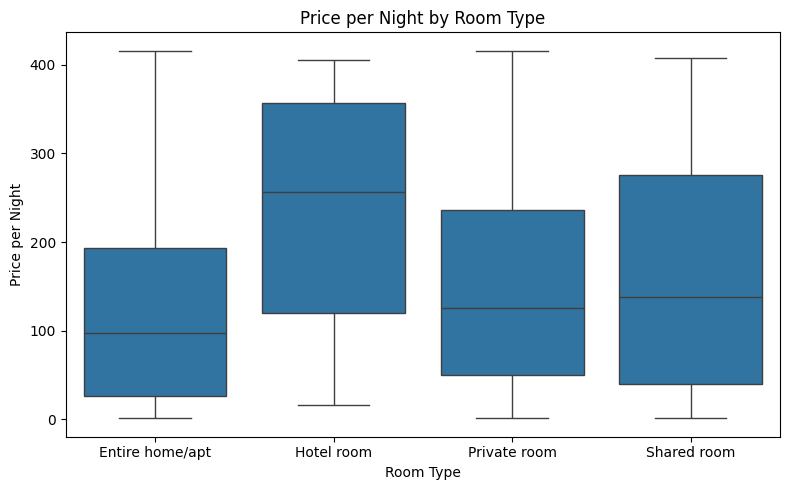

In [493]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room type', y='price_per_night')
plt.title('Price per Night by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price per Night')
plt.tight_layout()
plt.show()


**berikut insight yang dapat diambil:**

- Hotel room memiliki median harga per malam paling tinggi di antara semua tipe kamar.

- Entire home/apt memiliki median harga di bawah hotel room, namun distribusi harga cukup lebar, menandakan variasi harga yang besar.

- Private room dan Shared room memiliki median harga yang lebih rendah dibanding dua tipe lainnya.

- Semua tipe kamar memiliki rentang harga yang cukup besar, namun hotel room dan entire home/apt cenderung memiliki outlier di harga tinggi.

###**Feature Insight: Tipe Kamar Paling Menguntungkan**
**Definisi "Paling Menguntungkan":**

- Jika "menguntungkan" diartikan sebagai potensi pendapatan per malam tertinggi, maka tipe kamar dengan median harga tertinggi adalah yang paling menguntungkan.

**Berdasarkan Visualisasi:** \

- Hotel room adalah tipe kamar dengan median harga per malam paling tinggi.

- Artinya, secara rata-rata, pemilik hotel room bisa mendapatkan pendapatan per malam lebih besar dibanding tipe kamar lain.

**Kesimpulan Bisnis** \
`Tipe kamar yang paling menguntungkan berdasarkan output visual adalah:`

> Hotel room

Karena memiliki median harga per malam tertinggi, sehingga berpotensi memberikan pendapatan lebih besar bagi pemiliknya.

**Musim (Bulan) Apa yang Ramai Pengunjung?**

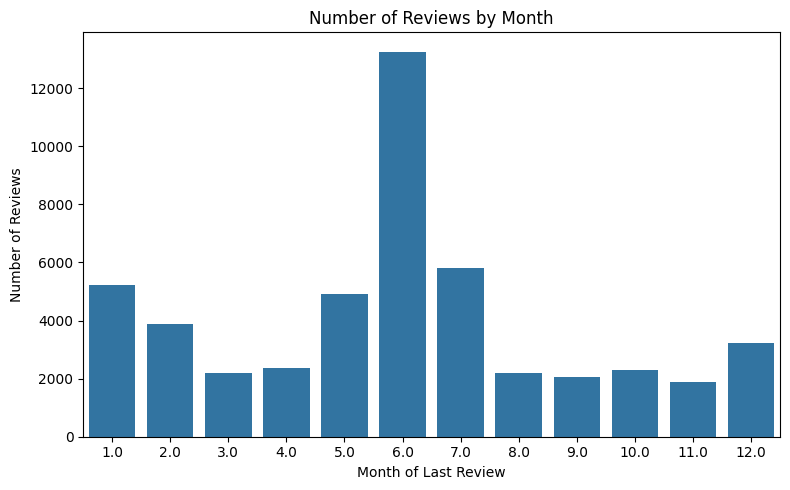

In [494]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='month_last_review')
plt.title('Number of Reviews by Month')
plt.xlabel('Month of Last Review')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

**Hasil Visualisasi** \
- Bulan ke-6 (Juni) menunjukkan jumlah review paling tinggi, jauh melampaui bulan-bulan lainnya.

- Bulan ke-7 (Juli) dan bulan ke-1 (Januari) juga cukup tinggi, namun tidak setinggi Juni.

- Bulan-bulan lain cenderung stabil di angka lebih rendah.

**Kesimpulan** \
Bulan yang paling ramai pengunjung adalah bulan Juni (bulan ke-6), terlihat dari lonjakan jumlah review yang sangat signifikan pada bulan tersebut. Ini menandakan bahwa pada bulan Juni, aktivitas pengunjung dan kemungkinan tingkat okupansi sangat tinggi dibandingkan bulan lain.

**Insight Bisnis** \
- Anda dapat fokus pada promosi, persiapan properti, atau penawaran spesial menjelang bulan Juni untuk memaksimalkan pendapatan.

- Jika ingin meningkatkan kunjungan di bulan lain, bisa dilakukan strategi diskon atau event khusus di bulan-bulan yang jumlah review-nya rendah.

**Apakah Harga Memengaruhi Jumlah Review?**

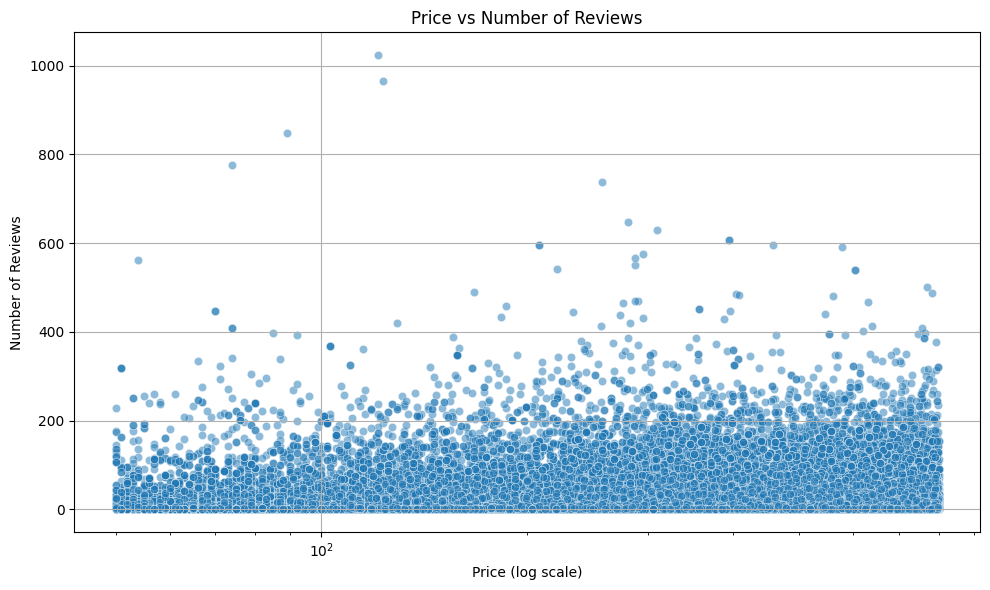

In [495]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='number of reviews', alpha=0.5)
plt.xscale('log')  # Menggunakan log scale untuk harga
plt.title('Price vs Number of Reviews')
plt.xlabel('Price (log scale)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight dari Plot:**
- Sebaran Data: Titik-titik tersebar cukup merata di seluruh rentang harga, terutama pada harga rendah hingga menengah. Pada harga tinggi, jumlah review cenderung tetap rendah.

- Tidak Ada Korelasi Jelas: Tidak terlihat pola naik atau turun yang signifikan antara harga dan jumlah review. Listing dengan harga rendah, menengah, maupun tinggi semuanya bisa memiliki jumlah review yang tinggi maupun rendah.

- Listing Harga Rendah-Medium: Cenderung memiliki lebih banyak listing dengan jumlah review tinggi, namun tidak berarti harga tinggi tidak mungkin mendapat review banyak.

- Harga Sangat Tinggi: Umumnya jumlah review tetap rendah hingga sedang, jarang yang sangat tinggi.

**Kesimpulan:** \
```
Harga tidak secara signifikan memengaruhi jumlah review.
Listing dengan harga berapa pun bisa mendapatkan jumlah review yang banyak atau sedikit. Namun, listing dengan harga rendah hingga menengah cenderung lebih sering mendapat review dalam jumlah besar dibandingkan listing dengan harga sangat tinggi
```

**Insight Bisnis:** \
- Jika tujuan Anda meningkatkan jumlah review (dan biasanya juga okupansi), harga yang kompetitif (tidak terlalu mahal) bisa menjadi salah satu faktor pendukung, walaupun bukan satu-satunya penentu.

- Faktor lain seperti lokasi, kualitas layanan, dan pengalaman tamu juga sangat berpengaruh terhadap jumlah review.

**Apakah Verified Host Punya Performa Lebih Baik?**

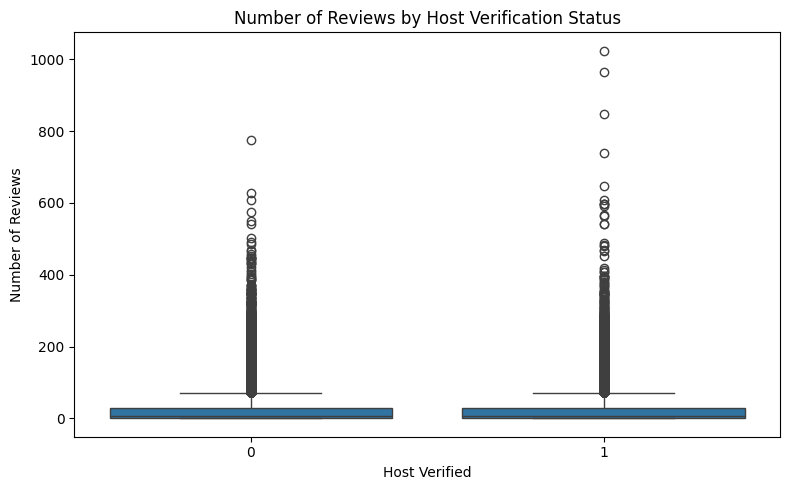

In [496]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_verified_host', y='number of reviews')
plt.title('Number of Reviews by Host Verification Status')
plt.xlabel('Host Verified')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


**Data Splitting**

In [497]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Asumsikan df adalah DataFrame Anda

# Misal kita ingin memprediksi 'price' menggunakan beberapa fitur
# ----> DEFINE X and y AFTER data cleaning operations on df
X = df[['price_per_night', 'room type', 'lat', 'long', 'neighbourhood', 'minimum nights', 'number of reviews']]
y = df['price']

# Buat instance OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False untuk output dense

# ----> FIT OneHotEncoder pada SEMUA fitur kategorikal:
categorical_features = ['room type', 'neighbourhood'] # Sertakan 'neighbourhood'
encoded_data = encoder.fit_transform(X[categorical_features])

# Buat DataFrame dengan kolom yang telah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=X.index) # uses X.index

# Hapus kolom kategorikal asli dan gabungkan kolom yang telah di-encode
X = X.drop(categorical_features, axis=1) # Hapus 'room type' dan 'neighbourhood'
X = pd.concat([X, encoded_df], axis=1)

# Pastikan X dan y memiliki jumlah baris yang sama sebelum di-split
assert X.shape[0] == y.shape[0], "Jumlah baris X dan y tidak sama!"

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [498]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Membuat model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model
rf_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.4046038838288344


In [499]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# Parameter distribusi (bisa diperluas sesuai kebutuhan)
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 11)
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,               # jumlah kombinasi yg dicoba (bisa ubah)
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit ke data training
random_search.fit(X_train, y_train)

# Model terbaik
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Evaluasi di test set
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 157}
Test RMSE: 2.49
Test R² Score: 1.00


In [502]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error # Import root_mean_squared_error

# Menghitung RMSE dan R²
rmse = root_mean_squared_error(y_test, y_pred) # Use root_mean_squared_error
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 2.493653970950653
R²: 0.9998653512263632


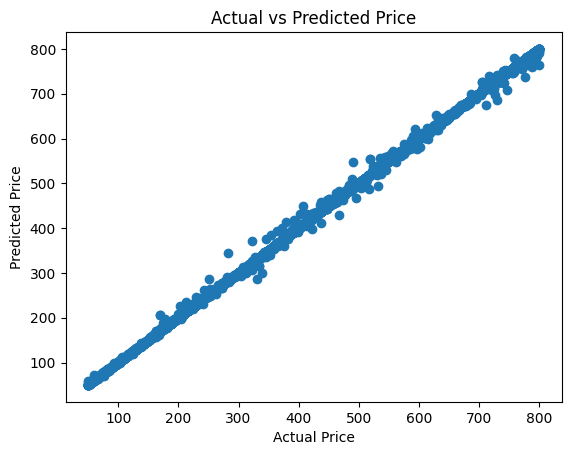

In [503]:
import matplotlib.pyplot as plt

# Visualisasi Prediksi vs Aktual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


In [504]:
# Prediksi menggunakan model terbaik
y_pred = best_model.predict(X_test)

# Jika ada target sebenarnya (y_test), hitung metrik evaluasi
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")

# Jika tidak ada y_test (misal data baru tanpa label), cukup tampilkan prediksi
print("Prediksi harga:", y_pred)


Test RMSE: 2.49
Test R² Score: 1.00
Prediksi harga: [283.         773.92356688 330.03184713 ... 674.9985138  172.
 106.98726115]


**TEST DATA**

In [512]:
import pandas as pd

# Buat DataFrame contoh untuk input data
new_data = pd.DataFrame({
    'price_per_night': [90],
    'room type': ['Entire home/apt'],
    'lat': [40.7008],
    'long': [-74.0060],
    'neighbourhood': ['Manhattan'],
    'minimum nights': [2],
    'number of reviews': [10]
}, index=[0]) # index=[0] untuk satu data point

# ----> Transformasikan fitur kategorikal dengan encoder yang SAMA:
categorical_features = ['room type', 'neighbourhood']
encoded_new_data = encoder.transform(new_data[categorical_features])

# ----> Buat DataFrame untuk data yang telah di-encode:
encoded_new_df = pd.DataFrame(encoded_new_data, columns=encoder.get_feature_names_out(categorical_features), index=new_data.index)

# ----> Gabungkan dengan data numerik:
new_data = new_data.drop(categorical_features, axis=1)
new_data = pd.concat([new_data, encoded_new_df], axis=1)

# ----> Prediksi dengan model terbaik:
predicted_price = best_model.predict(new_data)

print(f"Prediksi harga untuk input data: {predicted_price[0]:.2f}")

Prediksi harga untuk input data: 180.00
